In [1]:
from fenics import *
from mshr import *
from math import sin, cos, pi
import matplotlib.pyplot as mpl

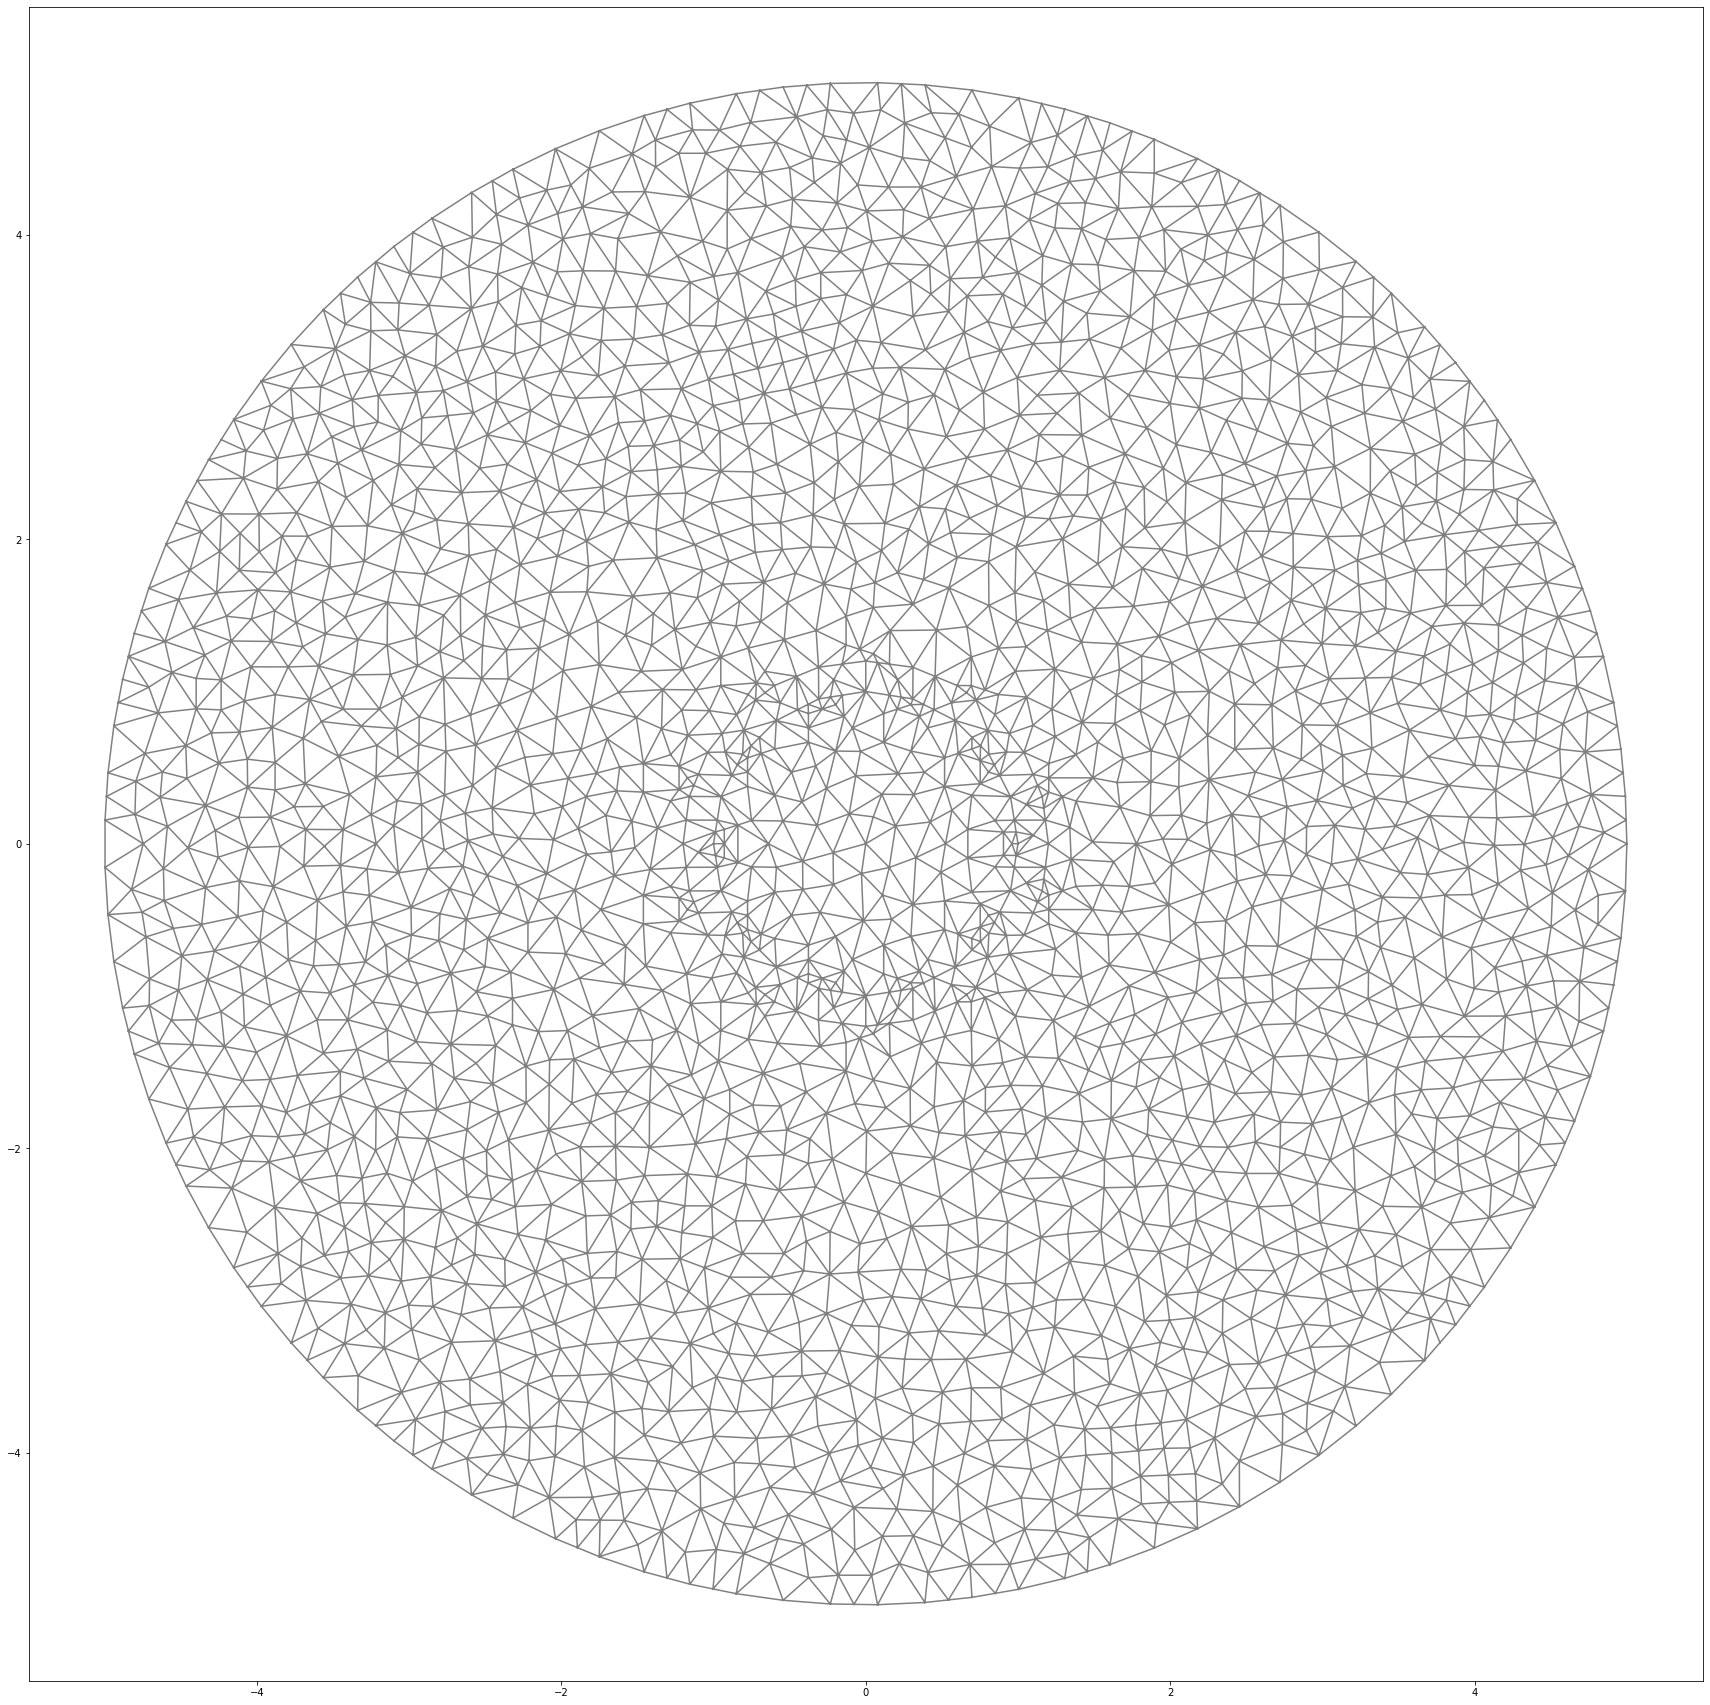

In [8]:
a = 1.0 # inner radius of iron cylinder
b = 1.2 # outer radius of iron cylinder
c_1 = 0.8 # radius for inner circle of copper wires
c_2 = 1.4 # radius for outer circle of copper wires
r = 0.16 # radius of copper wires
R = 5.0 # radius of domain
n = 10 # number of windings
# Define geometry for background
domain = Circle(Point(0, 0), R)
# Define geometry for iron cylinder
cylinder = Circle(Point(0, 0), b) - Circle(Point(0, 0), a)
# Define geometry for wires (N = North (up), S = South (down))
angles_N = [i*2*pi/n for i in range(n)]
angles_S = [(i + 0.5)*2*pi/n for i in range(n)]
wires_N = [Circle(Point(c_1*cos(v), c_1*sin(v)), r) for v in angles_N]
wires_S = [Circle(Point(c_2*cos(v), c_2*sin(v)), r) for v in angles_S]
# Set subdomain for iron cylinder
domain.set_subdomain(1, cylinder)
# Set subdomains for wires
for (i, wire) in enumerate(wires_N):
    domain.set_subdomain(2 + i, wire)
for (i, wire) in enumerate(wires_S):
    domain.set_subdomain(2 + n + i, wire)
# Create mesh
mesh = generate_mesh(domain, 32)

mpl.figure(figsize=(30,45))
plot(mesh)

In [3]:
# Define function space
V = FunctionSpace(mesh, ’P’, 1)
# Define boundary condition
bc = DirichletBC(V, Constant(0), ’on_boundary’)
# Define subdomain markers and integration measure
markers = MeshFunction(’size_t’, mesh, 2, mesh.domains())
dx = Measure(’dx’, domain=mesh, subdomain_data=markers)
# Define current densities
J_N = Constant(1.0)
J_S = Constant(-1.0)
# Define magnetic permeability
class Permeability(Expression):
def __init__(self, mesh, **kwargs):
self.markers = markers
def eval_cell(self, values, x, cell):
if markers[cell.index] == 0:
values[0] = 4*pi*1e-7 # vacuum
elif markers[cell.index] == 1:
values[0] = 1e-5 # iron (should really be 2.5e-1)
else:
values[0] = -6.4e-6 # copper (yes, it’s negative!)
mu = Permeability(mesh, degree=1)
# Define variational problem
A_z = TrialFunction(V)
v = TestFunction(V)

SyntaxError: invalid character in identifier (<ipython-input-3-3b9abb15c808>, line 2)